In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [2]:

# read data as pandas dataframe
spotifyData = pd.read_csv('Cleaned_Genres_2019_2020.csv')

In [3]:
# display first rows of data frame
print(spotifyData)

        Position                                      Track Name  \
0              1                                   thank u;;next   
1              2   Sunflower - Spider-Man: Into the Spider-Verse   
2              3  Taki Taki (with Selena Gomez;;Ozuna & Cardi B)   
3              4                                            Wow.   
4              5                               MIA (feat. Drake)   
...          ...                                             ...   
144995       196                                        MAMACITA   
144996       197                                         Falling   
144997       198                  Uptown Funk (feat. Bruno Mars)   
144998       199                                  Jocelyn Flores   
144999       200                           Every Breath You Take   

                 Artist  Streams        Date      Genre  
0         Ariana Grande  3978028    1/1/2019        Pop  
1           Post Malone  3883836    1/1/2019        Rap  
2        

In [4]:
#convert date column to datetime object
spotifyData['Date']= pd.to_datetime(spotifyData['Date'])

In [5]:
#filter data by year
spotifyData2019=spotifyData[spotifyData['Date'].dt.year==2019]
spotifyData2020=spotifyData[spotifyData['Date'].dt.year==2020]

In [6]:
print(spotifyData2019.head())



   Position                                      Track Name         Artist  \
0         1                                   thank u;;next  Ariana Grande   
1         2   Sunflower - Spider-Man: Into the Spider-Verse    Post Malone   
2         3  Taki Taki (with Selena Gomez;;Ozuna & Cardi B)       DJ Snake   
3         4                                            Wow.    Post Malone   
4         5                               MIA (feat. Drake)      Bad Bunny   

   Streams       Date      Genre  
0  3978028 2019-01-01        Pop  
1  3883836 2019-01-01        Rap  
2  3351784 2019-01-01        Edm  
3  3195966 2019-01-01        Rap  
4  2777884 2019-01-01  Reggaeton  


In [7]:
numberofgenre = spotifyData['Genre'].nunique()
print("numberofgenre:", numberofgenre)
unique_genres = spotifyData['Genre'].unique()
print(unique_genres)

numberofgenre: 8
['Pop' 'Rap' 'Edm' 'Reggaeton' 'Hip Hop' 'Rock' 'R&B' 'Other']


In [8]:
# group data by genre and streams 
genreStreams2019 = spotifyData2019.groupby('Genre')['Streams'].sum() / 1000000
genreStreams2020 = spotifyData2020.groupby('Genre')['Streams'].sum() / 1000000 


<function matplotlib.pyplot.show(close=None, block=None)>

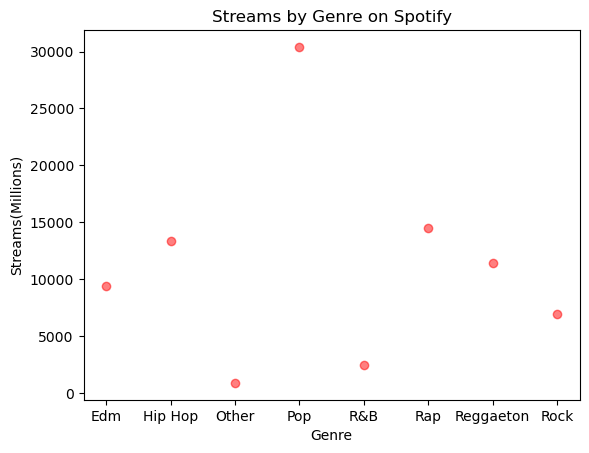

In [9]:
#create scatter plot
plt.scatter(genreStreams2019.index,genreStreams2019,  color='red', alpha=0.5, label=2019)
plt.title('Streams by Genre on Spotify')
plt.ylabel('Streams(Millions)')
plt.xlabel('Genre')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

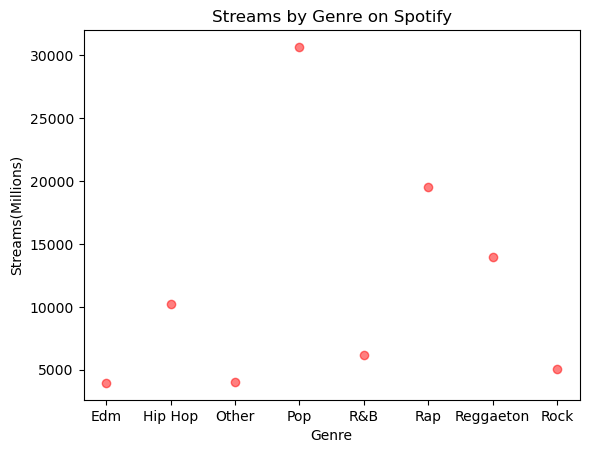

In [10]:
# create scatter plot for 2020
plt.scatter(genreStreams2020.index,genreStreams2020, color='red', alpha=0.5, label= 2020)
plt.title('Streams by Genre on Spotify')
plt.xlabel('Genre')
plt.ylabel('Streams(Millions)')
plt.show

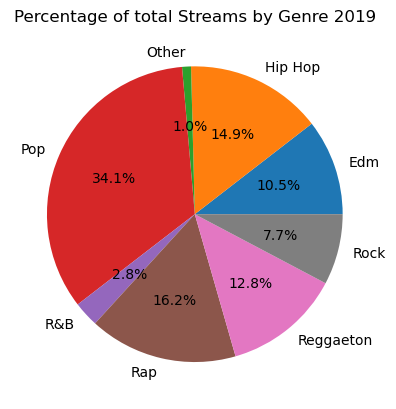

In [11]:
# create pie chart
plt.pie(genreStreams2019,labels=genreStreams2019.index, autopct='%1.1f%%')
plt.title('Percentage of total Streams by Genre 2019')
plt.show()

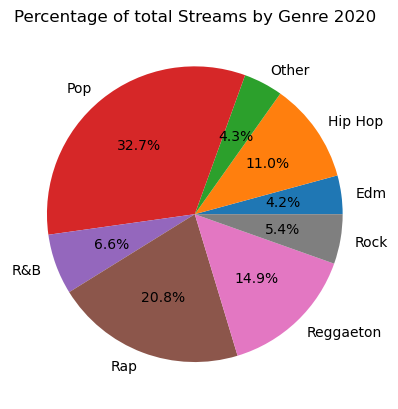

In [12]:
# create pie chart
plt.pie(genreStreams2020,labels=genreStreams2020.index, autopct='%1.1f%%')
plt.title('Percentage of total Streams by Genre 2020')
plt.show()

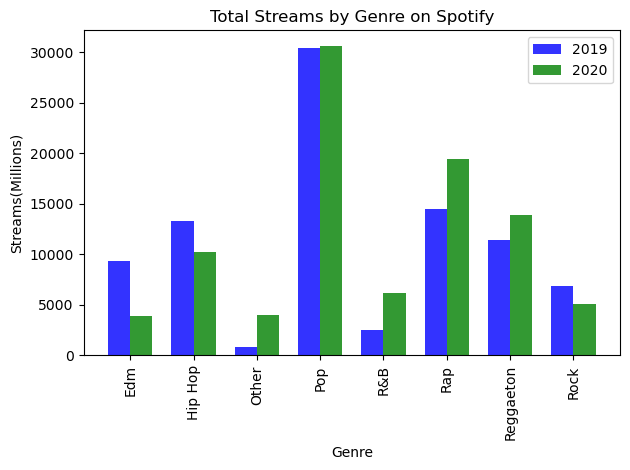

In [13]:
# create a bar plot
fig, ax =plt.subplots()
index = np.arange(len(genreStreams2019))
rects1= ax.bar(index, genreStreams2019.values, 0.35, alpha= 0.8, color='b', label='2019')
rects2= ax.bar(index+0.35, genreStreams2020.values, 0.35, alpha= 0.8, color='g', label=2020)


# set labels
ax.set_title('Total Streams by Genre on Spotify')
ax.set_xlabel('Genre')
ax.set_ylabel('Streams(Millions)')
ax.set_xticks(index+ 0.35/ 2)
ax.set_xticklabels(genreStreams2019.index, rotation=90)
ax.legend()
plt.tight_layout()
plt.show()

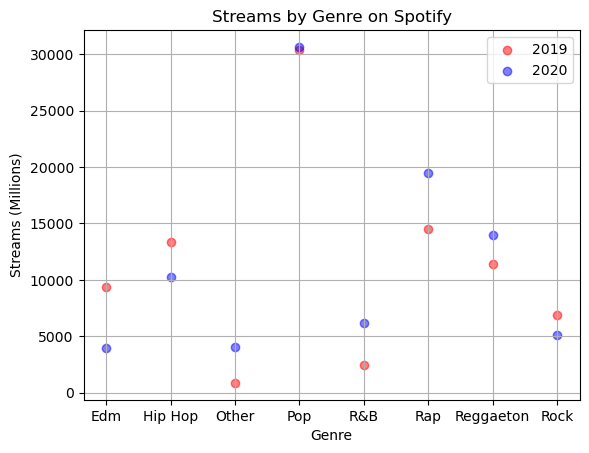

In [16]:
#crete scatter plot with 2019 and 2020 data
fig, ax = plt.subplots()
ax.scatter(genreStreams2019.index, genreStreams2019, color='red', alpha=0.5, label="2019")
ax.scatter(genreStreams2020.index, genreStreams2020, color='blue', alpha=0.5, label="2020")
ax.grid(True)
ax.set_title("Streams by Genre on Spotify")
ax.set_xlabel("Genre")
ax.set_ylabel("Streams (Millions)")
ax.legend()
plt.show()
